# 电器类商品数据分析


## 数据说明

数据集：elec-goods-sales.csv

该文件包含 2020 年 4 月至 2020 年 11 月电器类商品在线商店购买数据

- Unnamed: 行号
- event_time: 下单时间
- order_id: 订单编号
- product_id: 产品标号
- category_id: 类别编号
- category_code: 类别
- brand: 品牌
- price: 价格
- user_id: 用户编号
- age: 年龄
- sex: 性别
- local: 省份


## 结论

1. 在清明小长假、五一小长假、暑假、开学季、十一小长假等几个假期节点，销售金额、订单量、消费人数、客单价表现良好。尤其是开学季的表现最佳。为了确保供应充足，店铺在这些关键节点前一定要提前储备库存。
2. 在北上广地区，销售金额、订单量、消费人数、客单价均优于其他省份。尽管湖南省的消费人数较少，但客单价和订单量表现出色，显示出湖南省的潜力巨大。因此，应该增加对湖南省的宣传力度，吸引更多的消费人群。
3. 约 75%的消费人群购买力较低，针对 30 岁以下的人群，主要推荐价格亲民的商品。
4. 40-50 岁的人群购买力较高，尤其是男性对高价商品的购买力强。因此，在推荐给 40-50 岁男性消费者时，可以选择高价商品；而对女性消费者，可以推荐价格较高的商品。
5. 大多数用户至少消费了两次，并且消费金额与购物次数呈较强的正相关关系。用户购物次数越多，销售额也越大。可以在用户购物后的 8 天和 28 天内进行召回活动，引导客户再次消费。
6. 订单主要集中在早晨，特别是 8 点到 13 点是消费高峰期。在这段时间内，需要特别注意维持网站的稳定性。
7. 店铺可以在 1-4 月份减少营业人员数量，而在 5-11 月份增加营业人员数量，以应对销售高峰期。


## 初步处理数据


In [1]:
import os
from datetime import datetime

# 第三方库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# 设置中文编码和负号的正常显示
plt.rcParams["axes.unicode_minus"] = False

In [2]:
# 导入数据
df = pd.read_csv(r"./elec-goods-sales.csv")
df.head()

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
0,0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
1,1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
2,2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
3,3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
4,4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,32.0,女,广东


In [3]:
# 简要查看数据信息
df.describe()

,Unnamed: 0,order_id,product_id,category_id,price,user_id,age
count,5.641690e+05,5.641690e+05,5.641690e+05,5.641690e+05,564169.000000,5.641690e+05,564169.000000
mean,1.792965e+06,2.370552e+18,1.695711e+18,2.272919e+18,208.269324,1.515916e+18,33.184388
std,7.745342e+05,2.025138e+16,3.290688e+17,2.158282e+16,304.559875,2.377083e+07,10.122088
min,0.000000e+00,2.294360e+18,1.515966e+18,2.268105e+18,0.000000,1.515916e+18,16.000000
25%,1.658965e+06,2.353294e+18,1.515966e+18,2.268105e+18,23.130000,1.515916e+18,24.000000
50%,1.861597e+06,2.376886e+18,1.515966e+18,2.268105e+18,87.940000,1.515916e+18,33.000000
75%,2.473370e+06,2.388441e+18,1.515966e+18,2.268105e+18,277.750000,1.515916e+18,42.000000
max,2.633520e+06,2.388441e+18,2.388434e+18,2.374499e+18,18328.680000,1.515916e+18,50.000000


### 数据清洗


In [4]:
# 数据类型转化
df["event_time"] = pd.to_datetime(df["event_time"].str[:19], format="%Y-%m-%d %H:%M:%S")
# 分开写
df["Month"] = df["event_time"].dt.month
df["Day"] = df["event_time"].dt.day
df["Dayofweek"] = df["event_time"].dt.dayofweek
df["hour"] = df["event_time"].dt.hour

In [5]:
# 查看数据
df.head()

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,Month,Day,Dayofweek,hour
0,0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,4,11
1,1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,4,11
2,2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,4,14
3,3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,4,14
4,4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,32.0,女,广东,4,24,4,19


In [6]:
# 查看缺失值
np.sum(df.isnull())

Unnamed: 0            0
event_time            0
order_id              0
product_id            0
category_id           0
category_code    129370
brand             27224
price                 0
user_id               0
age                   0
sex                   0
local                 0
Month                 0
Day                   0
Dayofweek             0
hour                  0
dtype: int64

影响不打，所以用 missing 填充


In [7]:
df.fillna("missing").head()

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,Month,Day,Dayofweek,hour
0,0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,4,11
1,1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,4,11
2,2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,4,14
3,3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,4,14
4,4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,missing,karcher,217.57,1.515916e+18,32.0,女,广东,4,24,4,19


In [8]:
# 继续查看缺失值
np.sum(df.isnull())

Unnamed: 0            0
event_time            0
order_id              0
product_id            0
category_id           0
category_code    129370
brand             27224
price                 0
user_id               0
age                   0
sex                   0
local                 0
Month                 0
Day                   0
Dayofweek             0
hour                  0
dtype: int64

In [9]:
df["category_code"].fillna("missing", inplace=True)
df["brand"].fillna("missing", inplace=True)
np.sum(df.isnull())

Unnamed: 0       0
event_time       0
order_id         0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
age              0
sex              0
local            0
Month            0
Day              0
Dayofweek        0
hour             0
dtype: int64

缺失值全部解决


In [10]:
# 重复值检查
df.duplicated()
df.drop_duplicates()

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,Month,Day,Dayofweek,hour
0,0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,4,11
1,1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,4,11
2,2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,4,14
3,3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,4,14
4,4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,missing,karcher,217.57,1.515916e+18,32.0,女,广东,4,24,4,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564164,2633516,2020-11-21 10:10:01,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18,21.0,男,上海,11,21,5,10
564165,2633517,2020-11-21 10:10:13,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18,21.0,女,北京,11,21,5,10
564166,2633518,2020-11-21 10:10:30,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18,19.0,女,上海,11,21,5,10
564167,2633519,2020-11-21 10:10:30,2388440981134693944,2273948184839454837,2.268105e+18,missing,moulinex,41.64,1.515916e+18,19.0,女,上海,11,21,5,10


## 数据探索

### 店铺销售情况分析


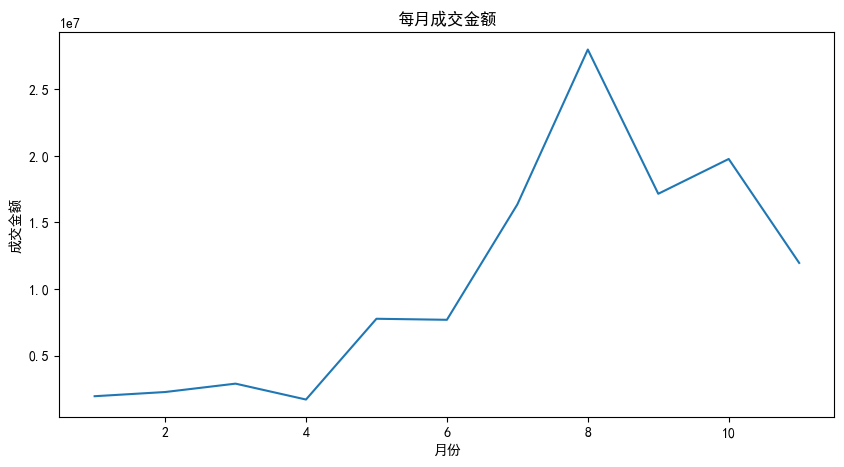

In [11]:
# 每月成交金额
# 商店消费情况绘图函数
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False


def store_plot(data, xlab, ylab, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)


# 每月成交金额，包含未成单金额
store_plot(
    data=df[df["price"] > 0].groupby("Month")["price"].sum(),
    xlab="月份",
    ylab="成交金额",
    title="每月成交金额",
)

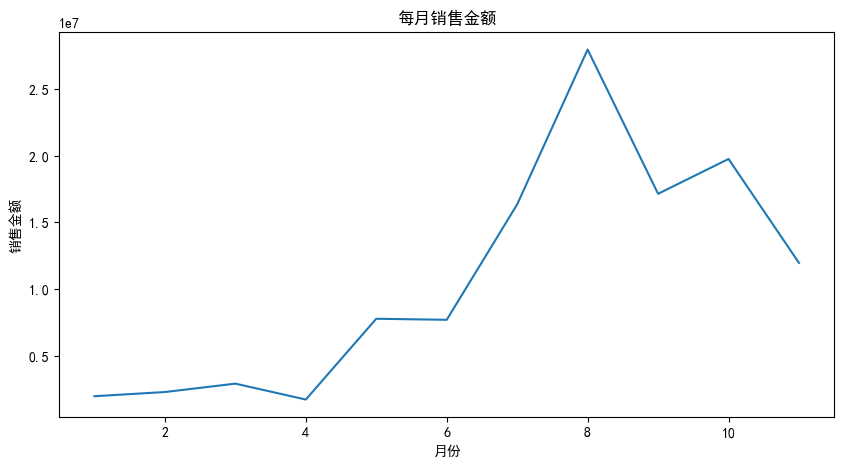

In [12]:
# 每月销售金额
store_plot(
    data=df.groupby("Month")["price"].sum(), xlab="月份", ylab="销售金额", title="每月销售金额"
)

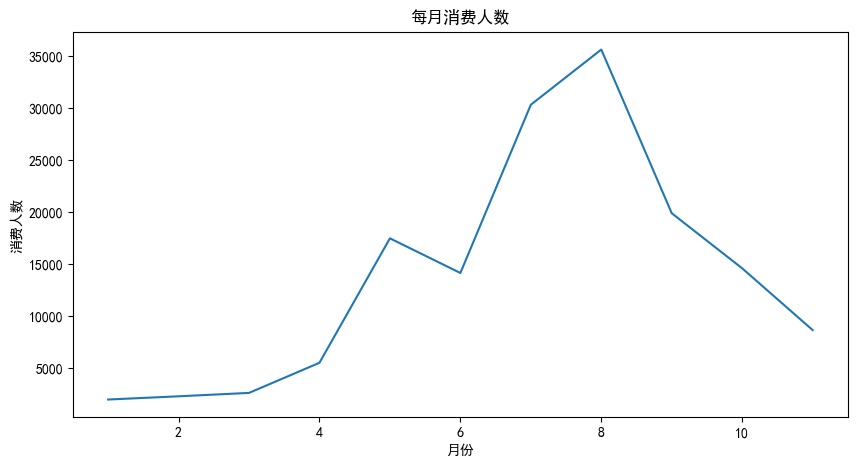

In [13]:
# 每月消费人数
store_plot(
    data=df[df["price"] > 0].groupby("Month")["user_id"].nunique(),
    xlab="月份",
    ylab="消费人数",
    title="每月消费人数",
)

每月消费人数 1~8 月上升，8~11 月下降，推测可能是五一小长假、暑假和开学季的影响


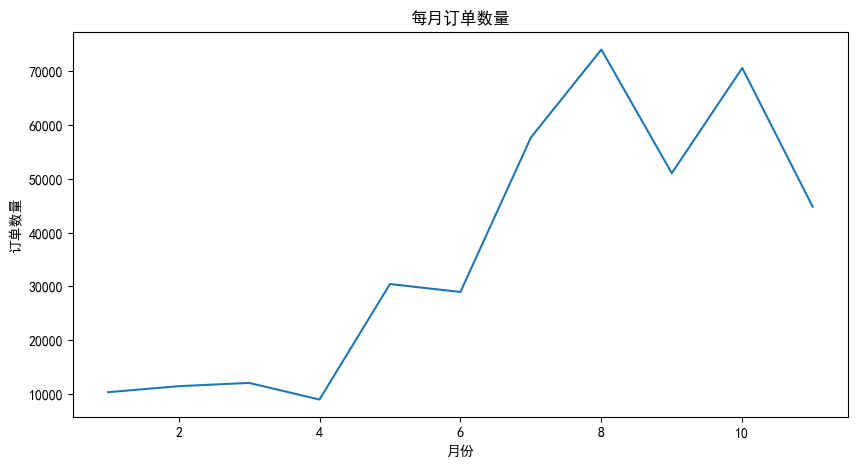

In [14]:
# 每月订单数量
store_plot(
    data=df[df["price"] > 0].groupby("Month")["order_id"].nunique(),
    xlab="月份",
    ylab="订单数量",
    title="每月订单数量",
)

分析同上


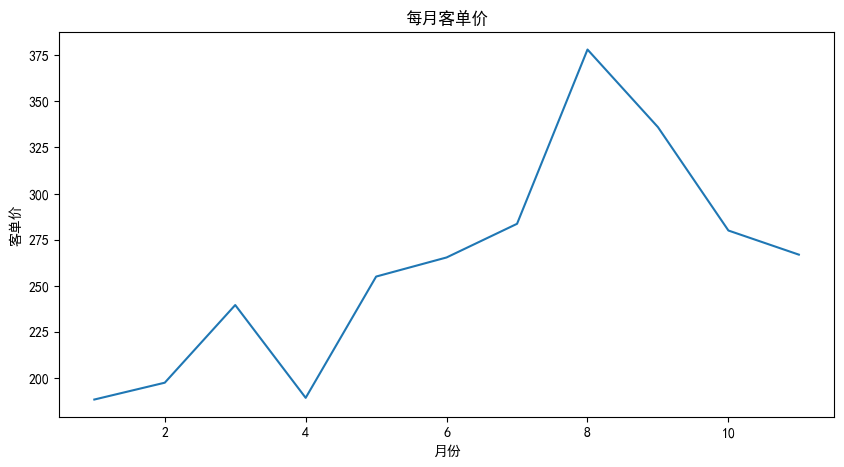

In [15]:
# 每月客单价
store_plot(
    data=df[df["price"] > 0].groupby("Month")["price"].sum()
    / df[df["price"] > 0].groupby("Month")["order_id"].nunique(),
    xlab="月份",
    ylab="客单价",
    title="每月客单价",
)

1. 小高峰分布在 3、8，8 月最高，是店铺全年营业。。。关键时期。。。
2. 销售金额约等于成交金额
3. 抓住关键假期


In [16]:
# 不同省份用户数量
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["KaiTi"]
plt.rcParams["axes.unicode_minus"] = False

Text(0.5, 1.0, '不同省份用户数量')

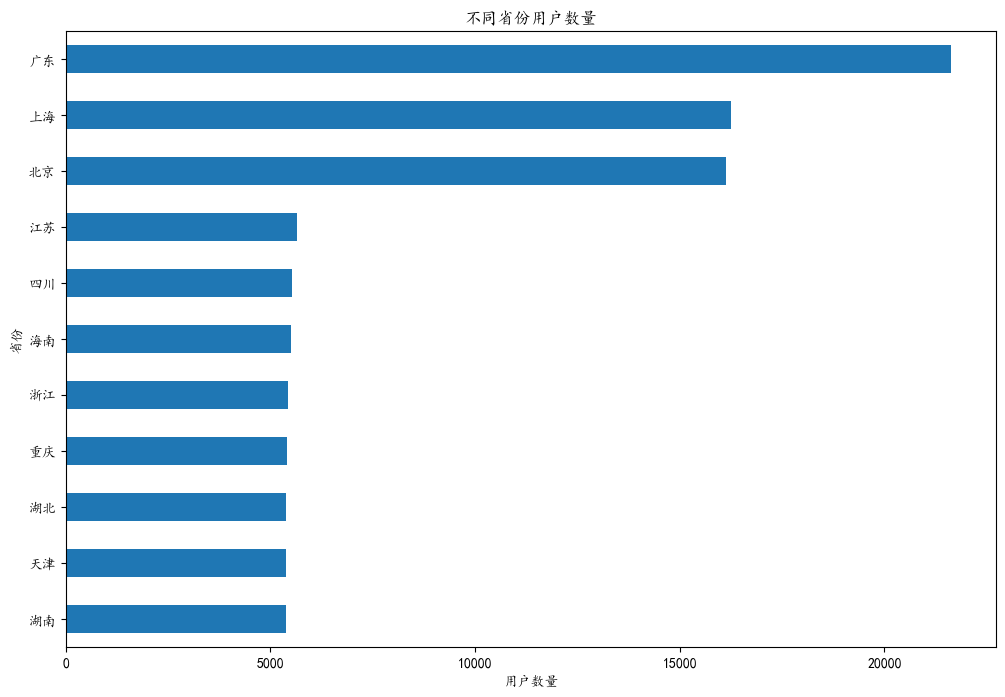

In [17]:
plt.figure(figsize=(12, 8))
df[df["price"] > 0].groupby("local")["user_id"].nunique().sort_values(
    ascending=True
).plot.barh()
plt.xlabel("用户数量")
plt.ylabel("省份")
plt.title("不同省份用户数量")

Text(0.5, 1.0, '不同省份订单数量')

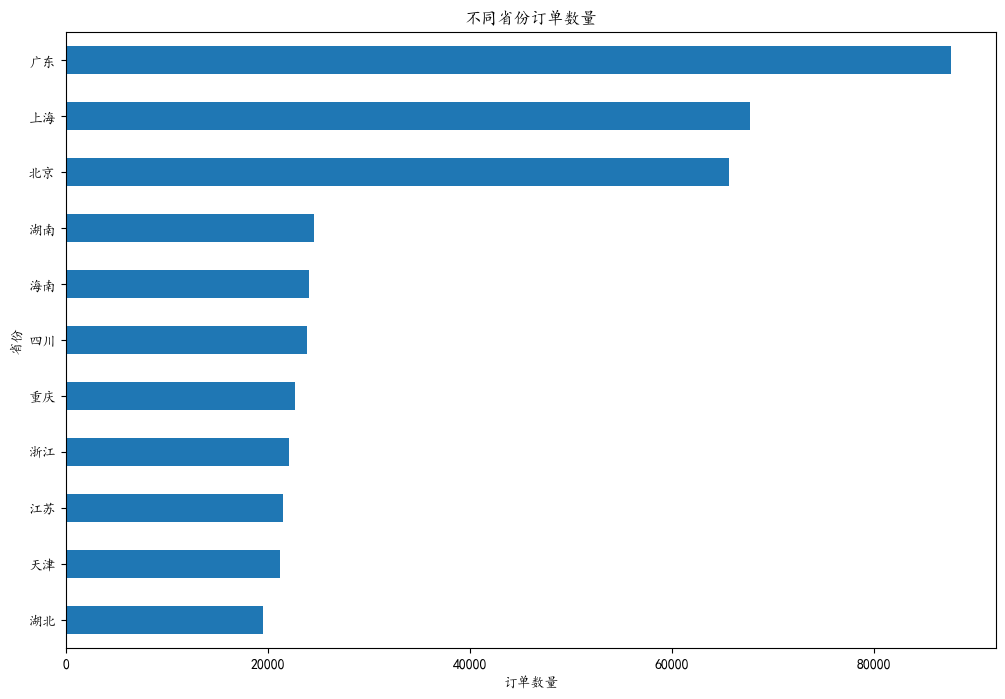

In [18]:
# 不同省份订单数量
plt.figure(figsize=(12, 8))
df[df["price"] > 0].groupby("local")["order_id"].nunique().sort_values(
    ascending=True
).plot.barh()
plt.xlabel("订单数量")
plt.ylabel("省份")
plt.title("不同省份订单数量")

Text(0.5, 1.0, '不同省份成交金额')

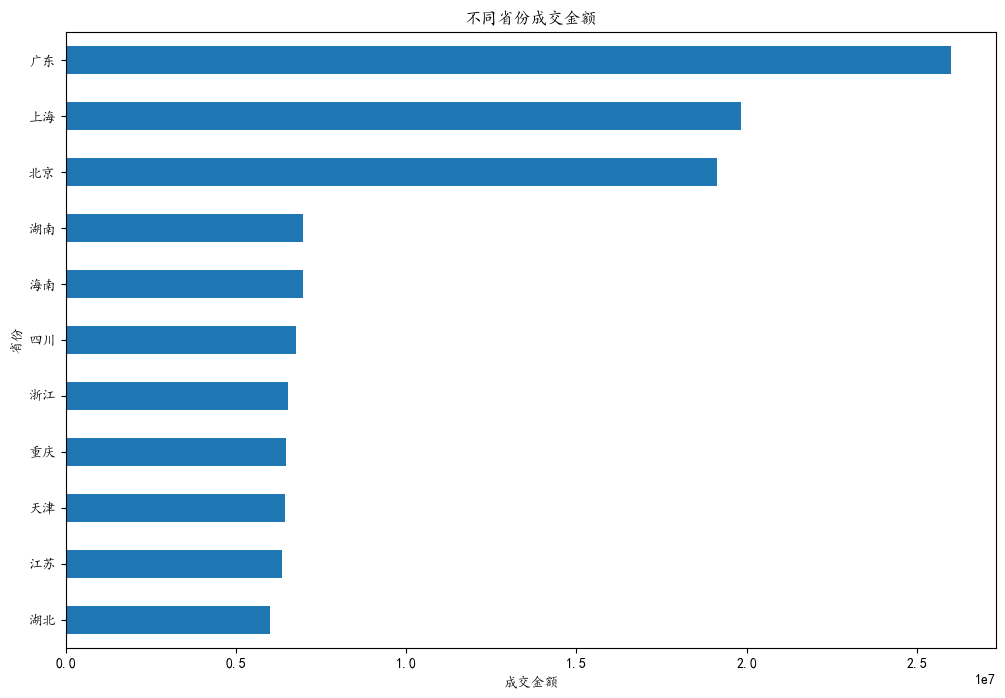

In [19]:
# 不同省份成交金额
plt.figure(figsize=(12, 8))
df[df["price"] > 0].groupby("local")["price"].sum().sort_values(
    ascending=True
).plot.barh()
plt.xlabel("成交金额")
plt.ylabel("省份")
plt.title("不同省份成交金额")

1. 北上广三样都稳居前三。
   2、湖南客户数量多，订单数相对较少，潜力巨大，应当。。。。


Text(0.5, 1.0, '订单数随星期变化')

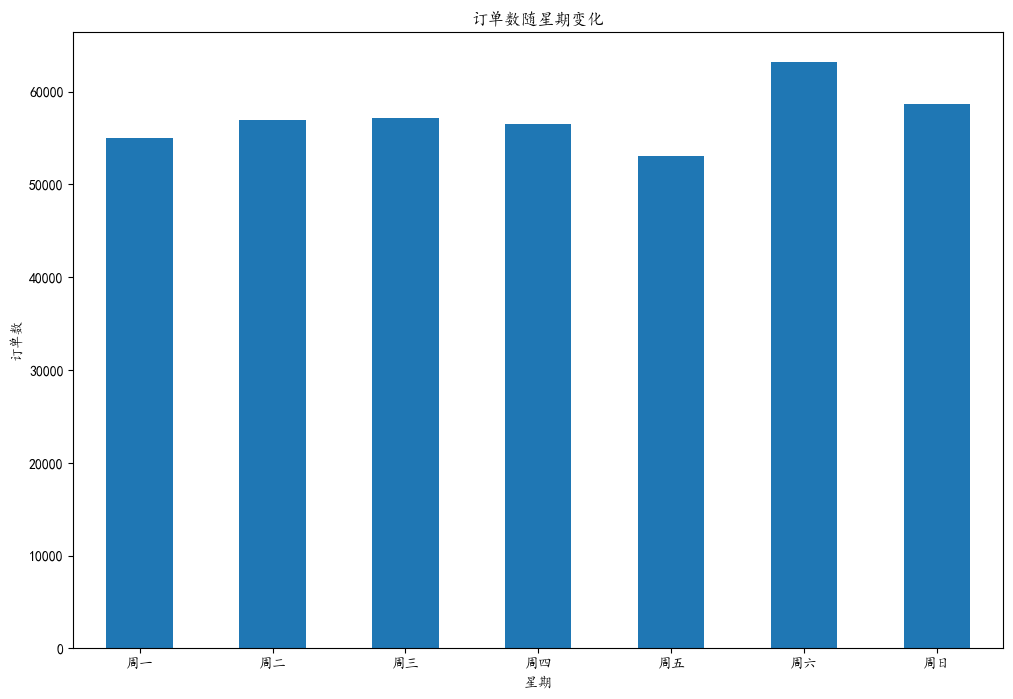

In [20]:
# 下单星期分布
plt.figure(figsize=(12, 8))
df[df["price"] > 0].groupby("Dayofweek")["order_id"].nunique().plot.bar()
plt.xticks(range(7), ["周一", "周二", "周三", "周四", "周五", "周六", "周日"], rotation=0)
plt.xlabel("星期")
plt.ylabel("订单数")
plt.title("订单数随星期变化")

周六是订单数最多，周日次之


Text(0.5, 1.0, '订单随小时数变化')

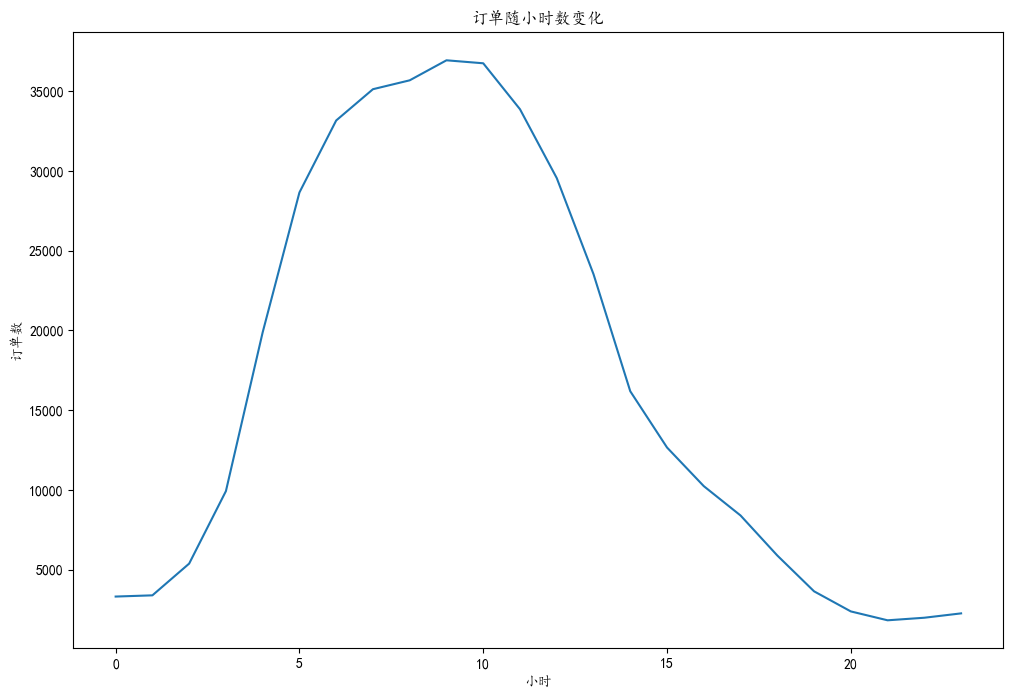

In [21]:
# 下单小时分布
plt.figure(figsize=(12, 8))
df[df["price"] > 0].groupby("hour")["order_id"].nunique().plot()
plt.xlabel("小时")
plt.ylabel("订单数")
plt.title("订单随小时数变化")

订单集中在早晨，8 点到 13 点是消费高峰期，这段时间要注意维持好网站的稳定性。


In [22]:
df[df["price"] == 0].count()

Unnamed: 0       39
event_time       39
order_id         39
product_id       39
category_id      39
category_code    39
brand            39
price            39
user_id          39
age              39
sex              39
local            39
Month            39
Day              39
Dayofweek        39
hour             39
dtype: int64

未完成支付的订单只有 39 单，对比完成支付订单可忽略不计，因此不做未完成订单数、订单金额的统计。


## 用户消费行为分析


In [23]:
# 用户消费次数&金额
df[df["price"] > 0].groupby("user_id").agg(
    {"order_id": "nunique", "price": "sum"}
).describe()

,order_id,price
count,93818.000000,93818.000000
mean,4.269074,1252.415276
std,18.191671,4205.922011
min,1.000000,0.020000
25%,1.000000,145.680000
50%,2.000000,460.580000
75%,3.000000,1152.570000
max,666.000000,165439.030000


1、有用户消费了 666 次，大概率是批发商
2、用户平均消费大于 75 分位数，存在高额消费用户


Text(0.5, 1.0, '消费次数与消费金额关系')

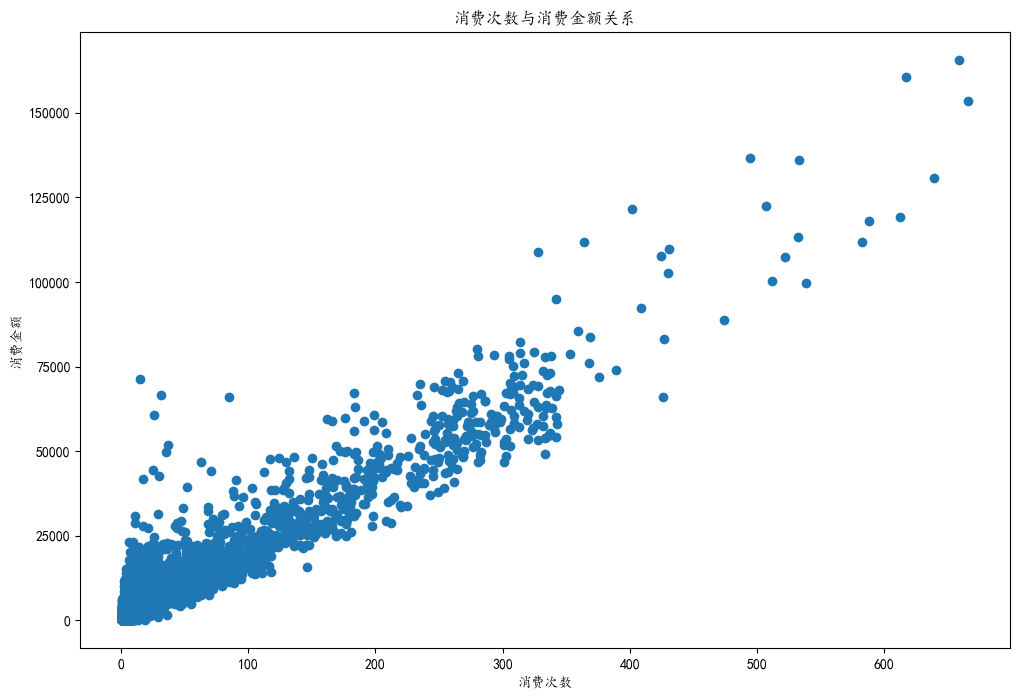

In [51]:
# 消费次数与消费金额的关系
plt.figure(figsize=(12, 8))
plt.scatter(
    x=df[df["price"] > 0].groupby("user_id")["order_id"].nunique(),
    y=df[df["price"] > 0].groupby("user_id")["price"].sum(),
)
plt.xlabel("消费次数")
plt.ylabel("消费金额")
plt.title("消费次数与消费金额关系")

消费次数和消费金额存在较强相关性，引导用户多次消费有利于。。。


In [25]:
# 用户消费周期
purchase_time = (
    df[df["price"] > 0]
    .groupby("user_id")
    .apply(lambda x: x["event_time"] - x["event_time"].shift())
    .dt.days
)
purchase_time.describe()

count    470312.000000
mean          9.665354
std         377.617753
min      -18452.000000
25%           0.000000
50%           0.000000
75%           1.000000
max       18557.000000
Name: event_time, dtype: float64

In [26]:
purchase_time[purchase_time > 0].describe()

count    125636.000000
mean         46.194204
std         638.377648
min           1.000000
25%           3.000000
50%           9.000000
75%          30.000000
max       18557.000000
Name: event_time, dtype: float64

至少消费两次的用户有一半是 9 天，75%的消费者消费金额在一个月，可以在 8 天、29 天两个时间点对用户进行推送和提醒


#### 新用户数量、活跃用户、不活跃用户、回流用户、回流率


Text(0.5, 1.0, '用户分层')

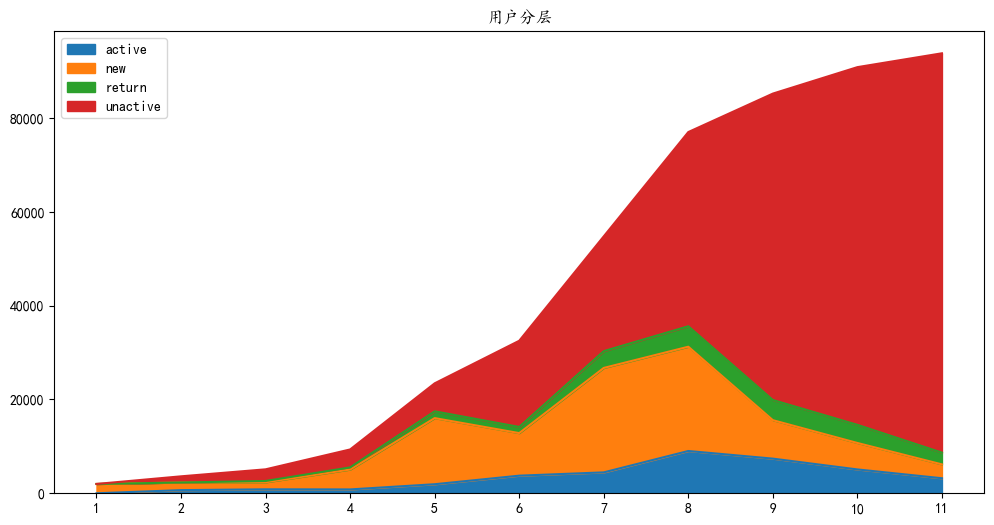

In [27]:
pivoted_amount = (
    df[df["price"] > 0]
    .pivot_table(index="user_id", columns="Month", values="price", aggfunc="mean")
    .fillna(0)
)
columns_month = df["Month"].sort_values().astype("str").unique()
pivoted_amount.columns = columns_month
pivoted_purchase = pivoted_amount.applymap(lambda x: 1 if x > 0 else 0)


# 用户分层
def active_status(data):
    status = []
    for i in range(11):
        # 若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i - 1] == "unreg":
                    status.append("unreg")
                else:
                    status.append("unactive")
            else:
                status.append("unreg")
        # 若本月消费
        else:
            if len(status) == 0:
                status.append("new")
            else:
                if status[i - 1] == "unactive":
                    status.append("return")
                elif status[i - 1] == "unreg":
                    status.append("new")
                else:
                    status.append("active")
    return pd.Series(status, index=columns_month)


pivoted_purchase_status = pivoted_purchase.apply(lambda x: active_status(x), axis=1)
purchase_status_counts = pivoted_purchase_status.replace("unreg", np.NaN).apply(
    lambda x: pd.value_counts(x)
)
purchase_status_counts.fillna(0).T.plot.area(figsize=(12, 6))
plt.xticks(range(11), columns_month)
plt.title("用户分层")

5 月开始大幅增加，8 月最多，估计和开学季相关


Text(0.5, 1.0, '回流率')

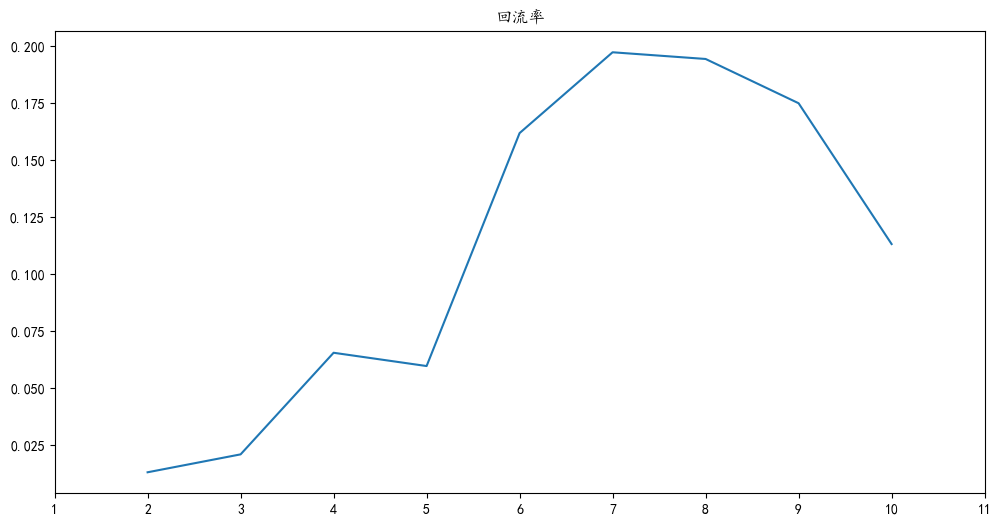

In [28]:
# 回流率
return_rate = purchase_status_counts.apply(lambda x: x / x.sum(), axis=1)
return_rate.loc["return"].plot(figsize=(12, 6))
plt.xticks(range(1, 12), columns_month)
plt.title("回流率")

同上。


Text(0.5, 1.0, '复购率')

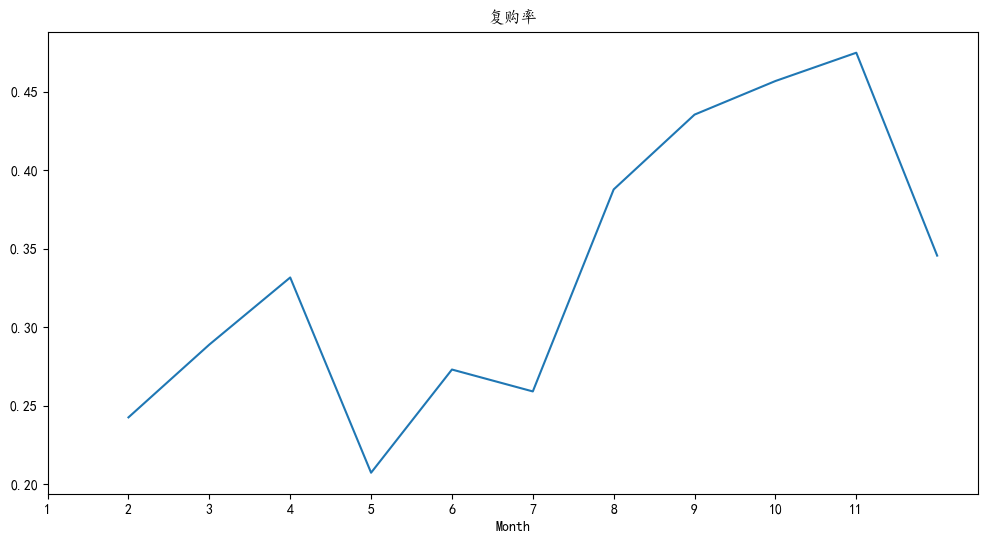

In [29]:
# 复购率
pivoted_counts = (
    df[df["price"] > 0]
    .pivot_table(index="user_id", columns="Month", values="order_id", aggfunc="nunique")
    .fillna(0)
)
columns_month = df["Month"].sort_values().astype("str").unique()
pivoted_counts_transf = pivoted_counts.applymap(
    lambda x: 1 if x > 1 else np.NaN if x == 0 else 0
)
(pivoted_counts_transf.sum() / pivoted_counts_transf.count()).plot(figsize=(12, 6))
plt.xticks(range(11), columns_month)
plt.title("复购率")

三个小高峰估计和清明小长假、五一小长假、十一小长假有关


Text(0.5, 1.0, '回购率')

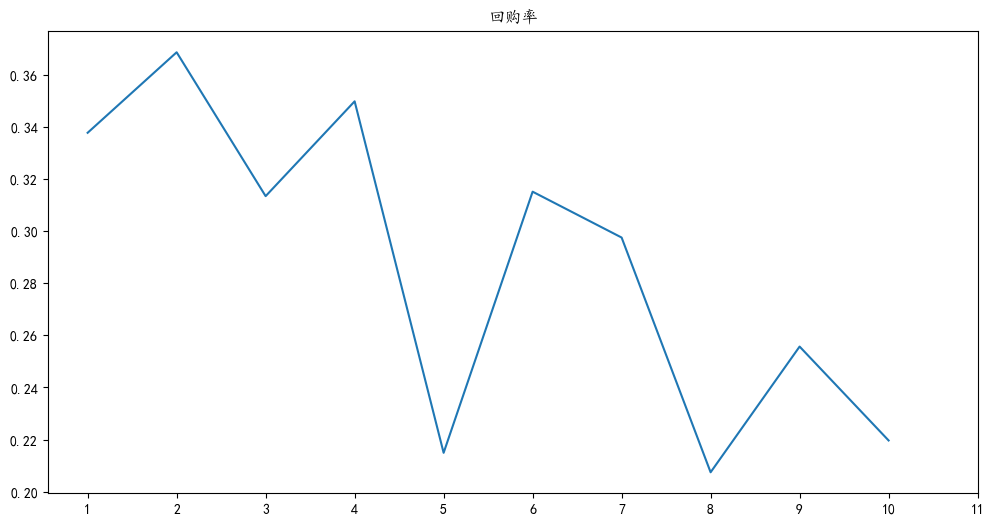

In [30]:
# 回购率
def purchase_return(data):
    status = []
    for i in range(10):
        if data[i] == 1:
            if data[i + 1] == 1:
                status.append(1)
            else:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status, index=columns_month)


pivoted_purchase_return = pivoted_purchase.apply(purchase_return, axis=1)
(pivoted_purchase_return.sum() / pivoted_purchase_return.count()).plot(figsize=(12, 6))
plt.xticks(range(11), columns_month)
plt.title("回购率")

同上


## 消费人群分层情况


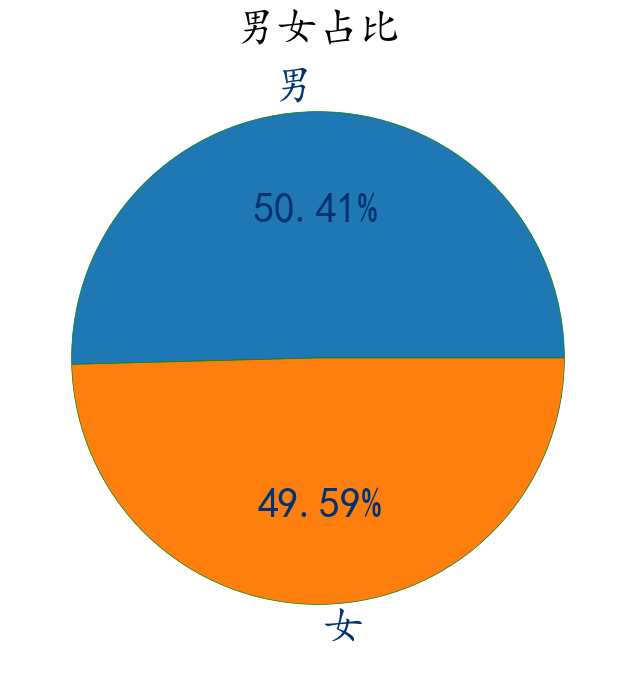

In [31]:
# 按性别分析
df_sex = df["sex"].value_counts()
df = df[df["price"] > 0]
plt.figure(figsize=(8, 8))
plt.pie(
    df_sex.values,
    labels=df_sex.index,
    autopct="%.2f%%",
    wedgeprops={"linewidth": 0.5, "edgecolor": "green"},
    textprops={"fontsize": 30, "color": "#003371"},
)
plt.title("男女占比", size=30)
plt.show()

购买人群男女占比基本是 1:1


In [32]:
# 按年龄段分析
df["age"].describe()

count    564130.000000
mean         33.184326
std          10.122218
min          16.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          50.000000
Name: age, dtype: float64

In [33]:
bins = [10, 20, 30, 40, 50]
df["age_box"] = pd.cut(df["age"], bins, labels=["10-20", "20-30", "30-40", "40-50"])
age_box = df["age_box"].value_counts()
age_box

age_box
40-50    169567
20-30    159756
30-40    156550
10-20     78257
Name: count, dtype: int64

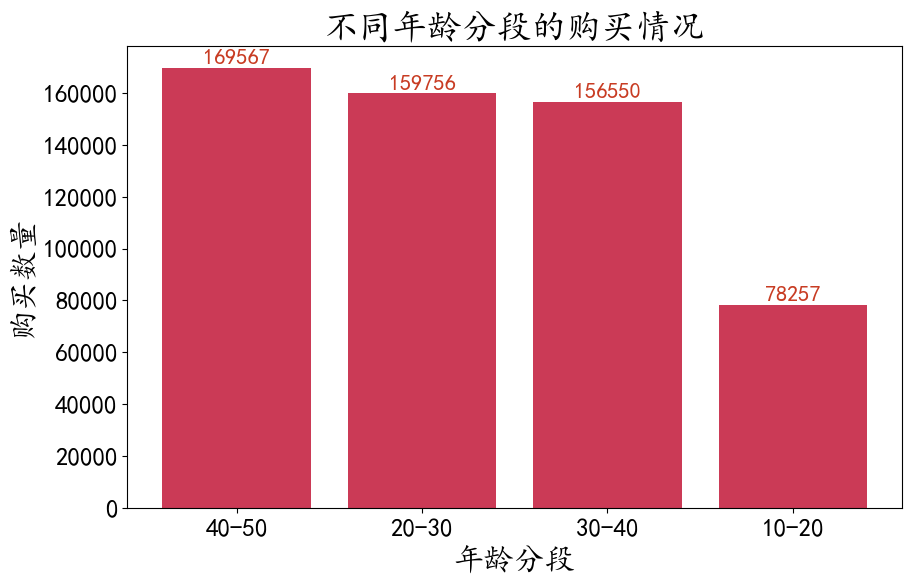

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(age_box.index, age_box.values, color="#cb3a56")
plt.ylabel("购买数量", size=22)
plt.xlabel("年龄分段", size=22)
plt.xticks(size=18)
plt.yticks(size=18)
for x, y in zip(age_box.index, age_box.values):
    plt.text(x, y + 500, "%d" % y, ha="center", va="bottom", size=16, color="#c83c23")
plt.title("不同年龄分段的购买情况", size=25)
plt.show()

40-50 岁的人群是购买主力，10-20 岁最少


In [35]:
df.groupby("age_box")["sex"].value_counts()

age_box  sex
10-20    女      39858
         男      38399
20-30    女      80159
         男      79597
30-40    男      81535
         女      75015
40-50    男      84863
         女      84704
Name: count, dtype: int64

In [38]:
df_brand = df["brand"].value_counts().head(12)
df[df["brand"].isin(df_brand.index)].groupby("sex").describe()["price"]

,count,mean,min,25%,50%,75%,max,std
sex,,,,,,,,
女,143151.0,287.819252,0.02,46.27,173.59,393.5,9606.48,346.133224
男,144958.0,289.186898,0.02,46.27,173.59,393.5,18328.68,356.553973


75 分位及以下消费情况一致，但男性对高价格的产品的消费能力更强


In [39]:
df[df["brand"].isin(df_brand.index)].groupby("age_box").describe()["price"]

,count,mean,min,25%,50%,75%,max,std
age_box,,,,,,,,
10-20,40064.0,288.570671,0.02,48.59,173.59,393.5000,7407.38,345.751456
20-30,81552.0,291.932090,0.02,46.27,173.59,396.1575,9606.48,352.620109
30-40,80530.0,289.774748,0.02,46.27,173.59,393.5000,11574.05,352.117137
40-50,85963.0,284.041581,0.02,46.27,162.01,381.9200,18328.68,352.188401


同上，34-40，40-50 岁的人群对高价格产品的。。。


### 通过 k-means 聚类分析

举例，华为品牌，分析年龄和消费水平


In [47]:
df_new = df.loc[:, ["price", "age", "brand"]]
# 截取分析华为需要的数据块
df_huawei = df_new.loc[df_new["brand"] == "huawei"]
df_huawei = df_huawei.loc[:, ["price", "age"]]
# 保存值方便预处理后恢复
age_max = df_huawei["age"].max()
age_min = df_huawei["age"].min()
price_max = df_huawei["price"].max()
price_min = df_huawei["price"].min()
df_huawei

,price,age
2,77.52,38.0
3,77.52,38.0
33,77.52,38.0
57,138.63,17.0
117,254.61,43.0
...,...,...
563834,231.46,23.0
563947,300.90,23.0
564032,324.05,25.0
564139,300.90,35.0


In [48]:
# 输入预处理，防止输入量不同维度不在同一数量级上，造成偏差
ms = MinMaxScaler()
df_huawei_procing = ms.fit_transform(df_huawei)
df_huawei = pd.DataFrame(df_huawei_procing, columns=df_huawei.columns)
df_huawei

,price,age
0,0.064376,0.647059
1,0.064376,0.647059
2,0.064376,0.647059
3,0.117323,0.029412
4,0.217812,0.794118
...,...,...
10717,0.197754,0.205882
10718,0.257919,0.205882
10719,0.277977,0.264706
10720,0.257919,0.558824


In [49]:
k_means_huawei = KMeans(n_clusters=4, random_state=0)  # 设置模型参数
k_means_huawei.fit(df_huawei)  # 构建模型
print(k_means_huawei)
df_huawei["labels"] = k_means_huawei.labels_  # 划分后的类别
print(df_huawei)

d:\Project\Python\bussiness-data\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)
          price       age  labels
0      0.064376  0.647059       3
1      0.064376  0.647059       3
2      0.064376  0.647059       3
3      0.117323  0.029412       1
4      0.217812  0.794118       0
...         ...       ...     ...
10717  0.197754  0.205882       1
10718  0.257919  0.205882       1
10719  0.277977  0.264706       1
10720  0.257919  0.558824       3
10721  0.157638  0.911765       0

[10722 rows x 3 columns]


In [50]:
# 预处理过的数据恢复
df_huawei["labels"].value_counts()  # 每个类别出现的频数
k_huawei_center = k_means_huawei.cluster_centers_  # 对应分4类的4个指标中心点，中心点的距离算出的4类
k_huawei_center[:, 0] = k_huawei_center[:, 0] * (price_max - price_min) + price_min
k_huawei_center[:, 1] = k_huawei_center[:, 1] * (age_max - age_min) + age_min
k_huawei_center

array([[189.33814825,  44.61978579],
       [187.1059467 ,  20.94267121],
       [849.69778711,  33.05882353],
       [180.48549582,  32.21754875]])